<a href="https://colab.research.google.com/github/edulapalle/CS584-ML-HW3/blob/main/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Santosh Reddy Edulapalle**

ML-HW3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading dataset

In [2]:
#required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras import Sequential

path = "/content/drive/MyDrive/A20501739_CollectedData_annotation.csv"
df = pd.read_csv(path)
#head
df.head(5)

,scorer,Unnamed: 1,Unnamed: 2,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
0,individuals,NaN,NaN,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,NaN,NaN,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,NaN,NaN,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Handling Null values**

Since our objective is to find the center of the image by taking average of topleft and rightbottom corners, we will simply take all NA values to be 0 so we don't get errors while doing calculations with any null values.

In [3]:
#replacing all NA with 0
df.fillna(0,inplace = True)
#df['annotation.26'].isnull().sum()
df.head(5)

,scorer,Unnamed: 1,Unnamed: 2,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
0,individuals,0.0,0,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,0.0,0,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,0.0,0,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,0,0,0,0,0,0,0,0,0,0
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cols = ["scorer","id","img","m1_topleft_x","m1_topleft_y","m1_rightdown_x","m1_rightdown_y","m1_nose_x","m1_nose_y","m1_leftear_x","m1_leftear_y","m1_rightear_x","m1_rightear_y","m1_leftHip_x","m1_leftHip_y","m1_rightHip_x","m1_rightHip_y","m1_tailBase_x","m1_tailBase_y","m1_tailEnd_x","m1_tailEnd_y","m2_topleft_x","m2_topleft_y","m2_rightdown_x","m2_rightdown_y","m2_nose_x","m2_nose_y","m2_leftear_x","m2_leftear_y","m2_rightear_x","m2_rightear_y","m2_leftHip_x","m2_leftHip_y","m2_rightHip_x","m2_rightHip_y","m2_tailBase_x","m2_tailBase_y","m2_tailEnd_x","m2_tailEnd_y"]

In [5]:
#renaming the columns
#df.columns = cols
df.set_axis(cols, axis='columns', inplace=True)
df.head(5)

,scorer,id,img,m1_topleft_x,m1_topleft_y,m1_rightdown_x,m1_rightdown_y,m1_nose_x,m1_nose_y,m1_leftear_x,...,m2_rightear_x,m2_rightear_y,m2_leftHip_x,m2_leftHip_y,m2_rightHip_x,m2_rightHip_y,m2_tailBase_x,m2_tailBase_y,m2_tailEnd_x,m2_tailEnd_y
0,individuals,0.0,0,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,0.0,0,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,0.0,0,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,0,0,0,0,0,0,0,0,0,0
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,0,0,0,0,0,0,0,0,0,0


We will try to copy data to dummy df and perfrom some operations.


In [6]:
#top-3 rows are just additional data, we don't require them.
df_copy = df
df_copy = df_copy[3:]


df_copy.head(5)

,scorer,id,img,m1_topleft_x,m1_topleft_y,m1_rightdown_x,m1_rightdown_y,m1_nose_x,m1_nose_y,m1_leftear_x,...,m2_rightear_x,m2_rightear_y,m2_leftHip_x,m2_leftHip_y,m2_rightHip_x,m2_rightHip_y,m2_tailBase_x,m2_tailBase_y,m2_tailEnd_x,m2_tailEnd_y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,0,0,0,0,0,0,0,0,0,0
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,0,0,0,0,0,0,0,0,0,0
5,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,146.84028879670976,189.79097324447577,338.9385009785614,285.0777848426165,156.75011720291639,220.28275295588077,181.90583546482554,...,0,0,0,0,0,0,0,0,0,0
6,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,146.0779943039246,202.74997962182283,366.38110271882596,348.34822774378193,159.79929517405688,269.0696004941288,174.28289053697426,...,0,0,0,0,0,0,0,0,0,0
7,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,232.2172719886438,174.54508338877326,393.06140996630535,230.95487585487263,240.60251140928023,214.18439701359978,242.12710039485046,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#adding new column
df_copy["m1_x"]= (df_copy["m1_topleft_x"].astype(float)+df_copy["m1_rightdown_x"].astype(float))/2
df_copy["m1_y"]= (df_copy["m1_topleft_y"].astype(float)+df_copy["m1_rightdown_y"].astype(float))/2
df_copy["m2_x"]= (df_copy["m2_topleft_x"].astype(float)+df_copy["m2_rightdown_x"].astype(float))/2
df_copy["m2_y"]= (df_copy["m2_topleft_y"].astype(float)+df_copy["m2_rightdown_y"].astype(float))/2

df_copy.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,scorer,id,img,m1_topleft_x,m1_topleft_y,m1_rightdown_x,m1_rightdown_y,m1_nose_x,m1_nose_y,m1_leftear_x,...,m2_rightHip_x,m2_rightHip_y,m2_tailBase_x,m2_tailBase_y,m2_tailEnd_x,m2_tailEnd_y,m1_x,m1_y,m2_x,m2_y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,0,0,0,0,0,0,241.055420,254.099248,0.0,0.0
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,0,0,0,0,0,0,307.684427,209.229483,0.0,0.0
5,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,146.84028879670976,189.79097324447577,338.9385009785614,285.0777848426165,156.75011720291639,220.28275295588077,181.90583546482554,...,0,0,0,0,0,0,242.889395,237.434379,0.0,0.0
6,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,146.0779943039246,202.74997962182283,366.38110271882596,348.34822774378193,159.79929517405688,269.0696004941288,174.28289053697426,...,0,0,0,0,0,0,256.229549,275.549104,0.0,0.0
7,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,232.2172719886438,174.54508338877326,393.06140996630535,230.95487585487263,240.60251140928023,214.18439701359978,242.12710039485046,...,0,0,0,0,0,0,312.639341,202.749980,0.0,0.0


In [8]:
print(df_copy.columns)

Index(['scorer', 'id', 'img', 'm1_topleft_x', 'm1_topleft_y', 'm1_rightdown_x',
       'm1_rightdown_y', 'm1_nose_x', 'm1_nose_y', 'm1_leftear_x',
       'm1_leftear_y', 'm1_rightear_x', 'm1_rightear_y', 'm1_leftHip_x',
       'm1_leftHip_y', 'm1_rightHip_x', 'm1_rightHip_y', 'm1_tailBase_x',
       'm1_tailBase_y', 'm1_tailEnd_x', 'm1_tailEnd_y', 'm2_topleft_x',
       'm2_topleft_y', 'm2_rightdown_x', 'm2_rightdown_y', 'm2_nose_x',
       'm2_nose_y', 'm2_leftear_x', 'm2_leftear_y', 'm2_rightear_x',
       'm2_rightear_y', 'm2_leftHip_x', 'm2_leftHip_y', 'm2_rightHip_x',
       'm2_rightHip_y', 'm2_tailBase_x', 'm2_tailBase_y', 'm2_tailEnd_x',
       'm2_tailEnd_y', 'm1_x', 'm1_y', 'm2_x', 'm2_y'],
      dtype='object')


Now splitting mouse-1, mouse-2 data seperately in to 2 dfs.

In [9]:
df_m1 = df_copy[['m1_topleft_x','m1_topleft_y','m1_rightdown_x','m1_rightdown_y','m1_nose_x','m1_nose_y','m1_leftear_x','m1_leftear_y','m1_rightear_x','m1_rightear_y','m1_leftHip_x','m1_leftHip_y','m1_rightHip_x','m1_rightHip_y','m1_tailBase_x','m1_tailBase_y','m1_tailEnd_x','m1_tailEnd_y','m1_x','m1_y']]
df_m1.head(5)
df_m2 = df_copy[['m2_topleft_x','m2_topleft_y','m2_rightdown_x','m2_rightdown_y','m2_nose_x','m2_nose_y','m2_leftear_x','m2_leftear_y','m2_rightear_x','m2_rightear_y','m2_leftHip_x','m2_leftHip_y','m2_rightHip_x','m2_rightHip_y','m2_tailBase_x','m2_tailBase_y','m2_tailEnd_x','m2_tailEnd_y','m2_x','m2_y']]
df_m2.head(5)

,m2_topleft_x,m2_topleft_y,m2_rightdown_x,m2_rightdown_y,m2_nose_x,m2_nose_y,m2_leftear_x,m2_leftear_y,m2_rightear_x,m2_rightear_y,m2_leftHip_x,m2_leftHip_y,m2_rightHip_x,m2_rightHip_y,m2_tailBase_x,m2_tailBase_y,m2_tailEnd_x,m2_tailEnd_y,m2_x,m2_y
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0


Now that, we have mouse-1 and mouse-2 data sepertley, we will try to build model for one mouse and use the same for the other mouse data.
**Plan to proceed:**

It is required/recommended to do scaling for neural networks.

We will plan to have two outputs(in this case mouse-1) ( m1_x and m1_y) and create the hidden layers accordingly, Then we will give our inputs and try to predict these m1_x and m1_y

We will use L2 loss (mse)


In [10]:
#converting object type to float type.
df_m1 = df_m1.apply(pd.to_numeric)
df_m2 = df_m2.apply(pd.to_numeric)

#df_m2.info()
#df_m2.describe()

In [29]:
#train test split (70-30) 70% train data 20% test data 10% validation unseen data.
train_m1, test_m1 = train_test_split(df_m1, test_size=0.2, random_state = 108)
train_m1, val_m1 = train_test_split(train_m1, test_size=0.1, random_state = 108) # we need to take out some values for predicting results (val_m1 - unseen data)

# train_m1 = df_m1.sample(frac=0.7, random_state=108)
# test_m1 = df_m1.drop(train_m1.index)


In [ ]:
#test_m1.describe()

In [12]:
#seperating target variable. # did not use this
train_features = df_m1.copy()
test_features = df_m1.copy()

# train_labels = train_features.pop('MPG')
# test_labels = test_features.pop('MPG')



In [13]:
#normalization layer # did not use this
#train_dataset.describe().transpose()[['mean', 'std']]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [34]:
#scaling funciton
#train_dataset.describe().transpose()[['mean', 'std']]
def normalisation(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('m1_x')
    y1 = np.array(y1)
    y2 = data.pop('m1_y')
    y2 = np.array(y2)
    return y1, y2

In [ ]:
# Get m1_x and m1_y as the 2 outputs and format them as np arrays

train_stats = train_m1.describe()
train_stats.pop('m1_x')
train_stats.pop('m1_y')
train_stats = train_stats.transpose()
train_Y = format_output(train_m1)
test_Y = format_output(test_m1)
val_Y = format_output(val_m1)#check on this line later

print(train_stats)

In [48]:
val_Y

(array([302.83810743, 560.12944202, 266.03587507, 325.83777794,
        395.45459618, 490.30292424, 267.56186773, 491.90102167,
        520.7472951 , 330.57796206]),
 array([269.34931659, 171.6167338 , 166.26679107, 271.98555311,
        238.94272495, 187.81167003, 226.7253329 , 201.11464745,
        165.24171768, 287.07827259]))

In [36]:
# Normalize the training and test data
norm_train_X = np.array(normalisation(train_m1))
norm_test_X = np.array(normalisation(test_m1))
norm_val_X = np.array(normalisation(val_m1))#check on this line later.

In [56]:
norm_train_X.shape


(90, 18)

In [37]:
#model building

model_m1 = Sequential([
    Input(shape=(len(train_m1.columns),)),
    Dense(units='64', name = 'hidden-1_before_m1_x',activation='relu'),
    Dense(units='32', name = 'hidden-2_before_m1_x',activation='relu'),

    # Y1 output will be fed from the first dense
    Dense(units='1', name='m1_x'),

    Dense(units='64', name = 'hidden-1_before_m1_y',activation='relu'),
    Dense(units='32', name = 'hidden-2_before_m1_y',activation='relu'),

    # Y2 output will be fed from the second dense
    Dense(units='1', name='m1_y')  

])
# def build_model():
#     # Define model layers.
#     input_layer = Input(shape=(len(train_m1.columns),))
#     first_dense = Dense(units='128', name = 'hidden-1_before_m1_x',activation='relu')(input_layer)
#     # Y1 output will be fed from the first dense
#     y1_output = Dense(units='1', name='output_m1_x')(first_dense)

#     second_dense = Dense(units='128', name = 'hidden-1_before_m1_y',activation='relu')(first_dense)
#     # Y2 output will be fed from the second dense
#     y2_output = Dense(units='1', name='output_m1_y')(second_dense)

#     # Define the model with the input layer and a list of output layers
#     model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

#     return model

In [38]:
#model compilation
#model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# we wil use Adam optimiser and start with lr = 0.01
model_m1.compile(optimizer=optimizer,
              #loss={'m1_x': 'mse', 'm1_y': 'mse'}, #we are insturcted to use L2 loss for both loss and evalution metrics.
              # metrics={'m1_x': tf.keras.metrics.RootMeanSquaredError(),
              #          'm1_y': tf.keras.metrics.RootMeanSquaredError()})
              loss='mse',
              metrics=tf.keras.metrics.RootMeanSquaredError())
                        

In [39]:
model_m1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1_before_m1_x (Dense  (None, 64)               1216      
 )                                                               
                                                                 
 hidden-2_before_m1_x (Dense  (None, 32)               2080      
 )                                                               
                                                                 
 m1_x (Dense)                (None, 1)                 33        
                                                                 
 hidden-1_before_m1_y (Dense  (None, 64)               128       
 )                                                               
                                                                 
 hidden-2_before_m1_y (Dense  (None, 32)               2080      
 )                                                    

In [40]:
# Train the model for 100 epochs
epochs = 100
history = model_m1.fit(norm_train_X, train_Y,
                    epochs=epochs, 
                    batch_size=1,
                     validation_data=(norm_test_X, test_Y))

Epoch 1/100
90/90 [==============================] - 1s 5ms/step - loss: 103205.3906 - root_mean_squared_error: 321.2560 - val_loss: 91421.7734 - val_root_mean_squared_error: 302.3603
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 50144.2109 - root_mean_squared_error: 223.9290 - val_loss: 25545.9219 - val_root_mean_squared_error: 159.8309
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 11710.0000 - root_mean_squared_error: 108.2128 - val_loss: 20022.3457 - val_root_mean_squared_error: 141.5003
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 8554.2412 - root_mean_squared_error: 92.4891 - val_loss: 18103.3906 - val_root_mean_squared_error: 134.5488
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 6203.6860 - root_mean_squared_error: 78.7635 - val_loss: 17042.2539 - val_root_mean_squared_error: 130.5460
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 4615.7905 - roo

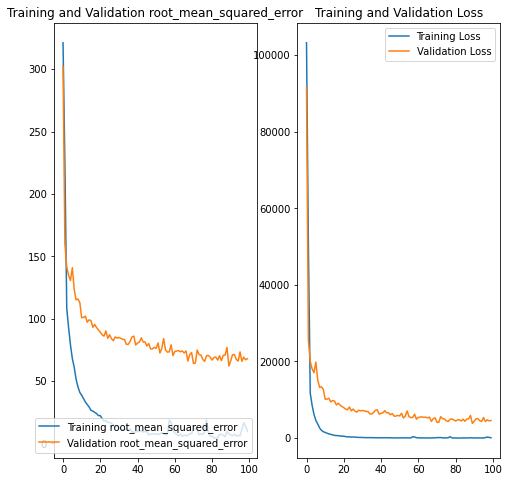

In [41]:
acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training root_mean_squared_error')
plt.plot(epochs_range, val_acc, label='Validation root_mean_squared_error')
plt.legend(loc='lower right')
plt.title('Training and Validation root_mean_squared_error')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
# Test the model and print loss and rmse for both outputs # here we are using validation data.
# test_results = {}

# test_results['m1_x1'] = model_m1.evaluate(
#     test_features['m1_x1'],
#     test_labels, verbose=0)

loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model_m1.evaluate(x=norm_val_X, y=val_Y) # we need to take some data before starting the project to validate here.( unseen data)

print()
print(f'loss: {loss}')
print(f'm1_x_loss: {Y1_loss}')
print(f'm1_y_loss: {Y2_loss}')
print(f'm1_x_rmse: {Y1_rmse}')
print(f'm1_y_rmse: {Y2_rmse}')

1/1 [==============================] - 0s 114ms/step - loss: 183.2698 - root_mean_squared_error: 13.5377


ValueError: ignored

In [32]:
#plotting
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

2/2 [==============================] - 0s 5ms/step


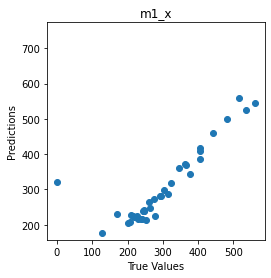

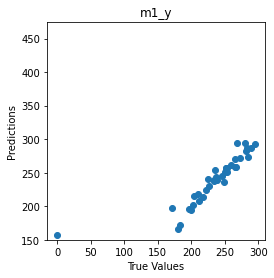

In [33]:
# Run predict
Y_pred = model.predict(norm_test_X)
m1_x_pred = Y_pred[0]
m1_y_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='m1_x')
plot_diff(test_Y[1], Y_pred[1], title='m1_y')

In [13]:
# #splitting dataset
# train_df = df.sample(frac=0.7, random_state=0)
# test_df = df.drop(train_df.index)
# print("training df size: "+str(train_df.shape))
# print("testing df size: "+str(test_df.shape))
